In [1]:
%matplotlib notebook
from Models import *
plt.rcParams['animation.ffmpeg_path'] = u"/usr/bin/ffmpeg"

In [2]:
INTERACTION_ENERGY = 1.0

In [3]:
lattice = SpinLattice.build1d_random(8, 8)
runner = SimulationRunner(model='Ising', temperature=1.9, magnetic_field=None, epoch=10000)
results = runner.run(lattice, verbose=True)

Running: 100%|██████████| 10000/10000 [00:16<00:00, 588.38it/s]


<IPython.core.display.Javascript object>


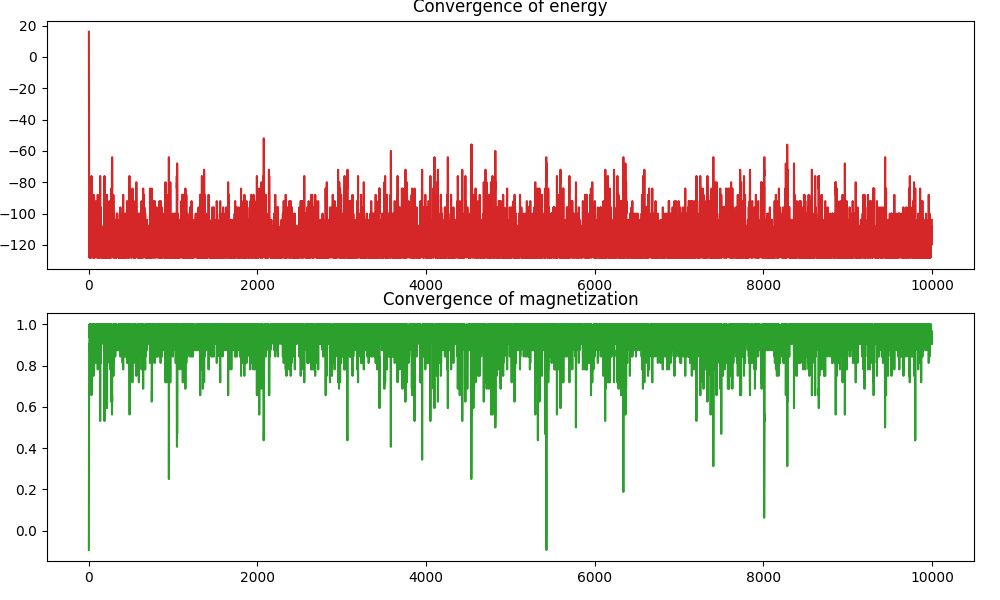

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Convergence of energy')
ax[0].plot(results.energy(None, 0, -1), color='tab:red')
ax[1].set_title('Convergence of magnetization')
ax[1].plot(results.magnetization(0, -1), color='tab:green')
plt.show()

<IPython.core.display.Javascript object>


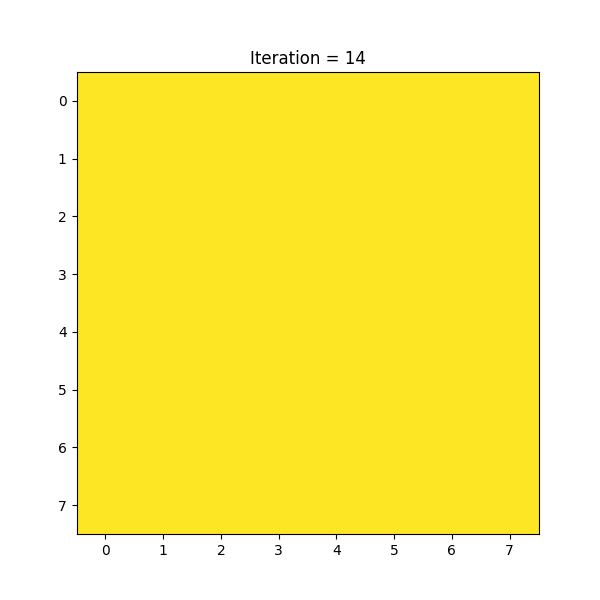

In [5]:
ani = results.visualize(1, 10000)

<IPython.core.display.Javascript object>


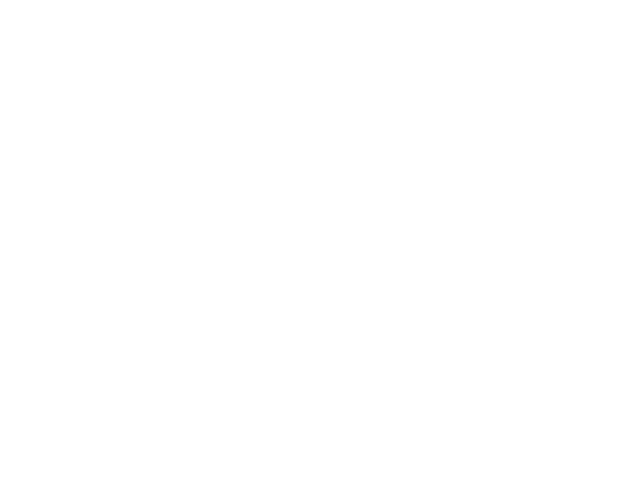

KeyboardInterrupt: 

In [6]:
ani.save('J1T1.9.mp4', writer="ffmpeg")

In [7]:
temperatures = np.arange(0.01, 4, 0.2)
resultsT = list()
for temperature in tqdm(temperatures):
    runner = SimulationRunner(model='Ising', temperature=temperature, magnetic_field=None, epoch=10000)
    resultsT.append(runner.run(lattice, verbose=False))

  0%|          | 0/20 [00:00<?, ?it/s]Models.py:251: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-(e1 - e0) / self.temperature)
100%|██████████| 20/20 [04:40<00:00, 14.02s/it]


In [8]:
E_ls = [np.mean(res.energy(None,1000, -1)) for res in resultsT]
M_ls = [np.mean(res.magnetization(1000, -1)) for res in resultsT]

<IPython.core.display.Javascript object>


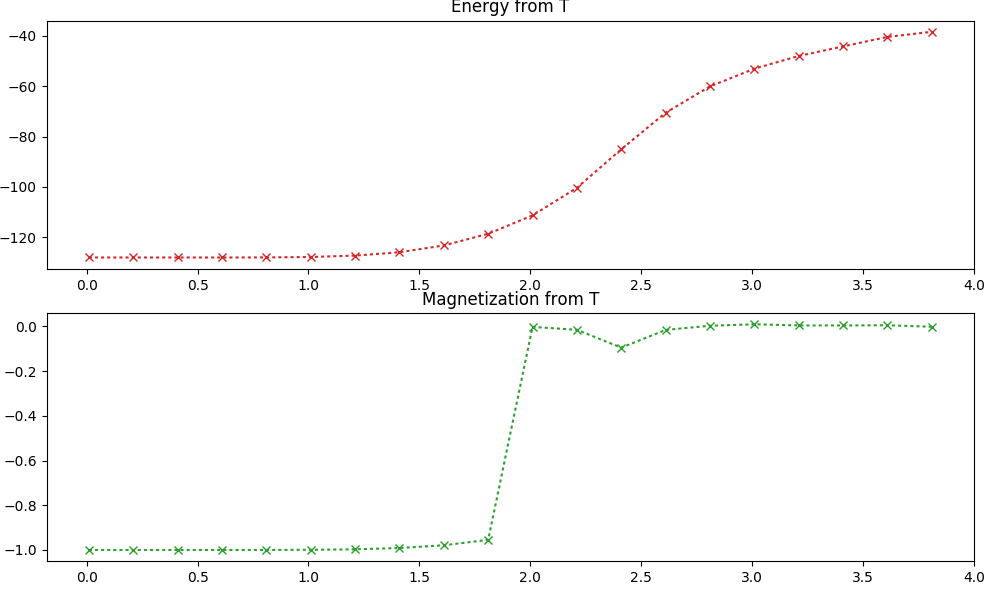

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Energy from T')
ax[0].plot(temperatures, E_ls, 'x:', color='tab:red')
ax[1].set_title('Magnetization from T')
ax[1].plot(temperatures, M_ls, 'x:', color='tab:green')
plt.show()

In [15]:
big_lattice = SpinLattice.build1d_random(64, 64)
runner = SimulationRunner(model='Ising', temperature=2.0, magnetic_field=None, epoch=10000)
big_results = runner.run(big_lattice, verbose=True)

Running: 100%|██████████| 10000/10000 [14:43<00:00, 11.31it/s]


In [ ]:
anim = big_results.visualize(0, 10000)

<IPython.core.display.Javascript object>


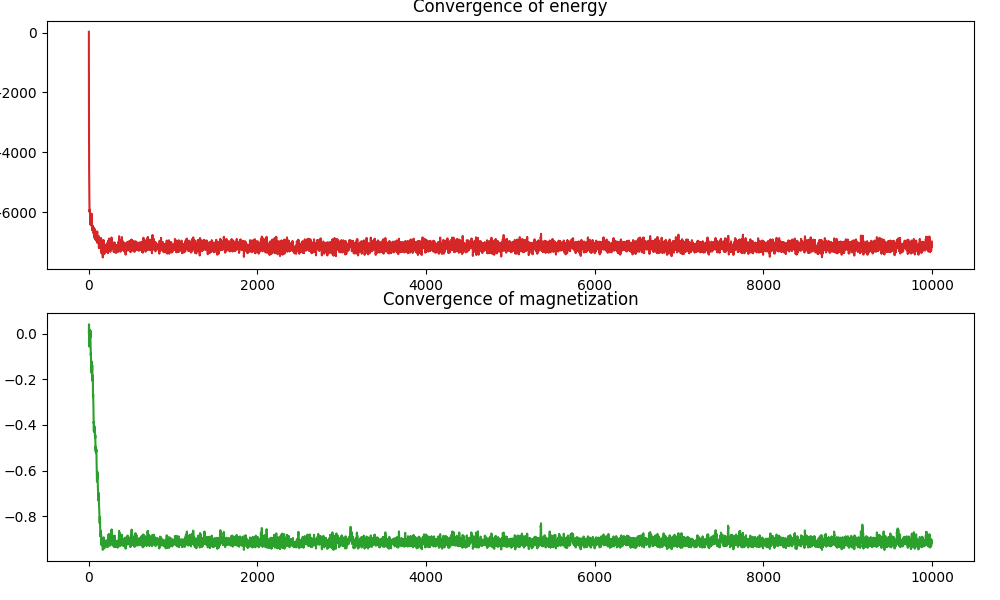

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Convergence of energy')
ax[0].plot(big_results.energy(None, 0, -1), color='tab:red')
ax[1].set_title('Convergence of magnetization')
ax[1].plot(big_results.magnetization(0, -1), color='tab:green')
plt.show()